In [29]:
from source.krachspinsystem import SpinSystem
from source.utils import read_config_file, reconstruct_grid, visualize_grid, plot_array_list
from datetime import datetime
import numpy as np
from numpy import empty, nan, savetxt
import matplotlib.pyplot as plt
import random

In [30]:
MAX_FILE_SIZE = 100_000

config_filename = "multising.conf"
config = read_config_file(config_filename)

In [53]:
grid_height   = int(config["grid_height"])
grid_width    = int(config["grid_width"])
j             = float(config["j"])
alpha         = float(config["alpha"])
total_updates = int(config["total_updates"])
init_up       = float(config["init_up"])
T             = float(config["T"])
beta          = 1.0 / T
reduced_neighbour_coupling = -2.0 * beta * j

magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
magnetisation[:] = nan

# I. Without crash

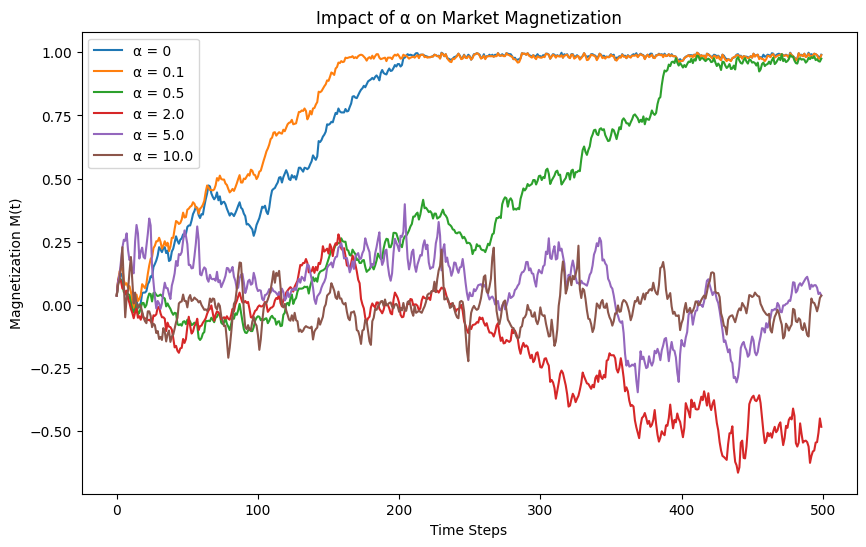

In [ ]:
# Initialisation
magnetisation_values = {}
full_grids = {}
alphas = [0, 0.1, 0.5, 2.0, 5.0, 10.0]

for alpha in alphas:
    SEED = 42
    np.random.seed(SEED)
    random.seed(SEED)
    
    reduced_alpha = -2.0 * beta * alpha
    spin_system = SpinSystem(grid_height=32, grid_width=32, init_up=0.5)
    magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
    magnetisation[:] = nan

    full_grid = []
    full_grid.append(reconstruct_grid(spin_system.black, spin_system.white))

    for ii in range(total_updates):
        mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
        magnetisation[ii % MAX_FILE_SIZE] = mag
        full_grid.append(reconstruct_grid(spin_system.black, spin_system.white))
    
    magnetisation_values[alpha] = magnetisation.copy()
    full_grids[alpha] = full_grid.copy()

# Tracé des courbes de magnétisation
plt.figure(figsize=(10, 6))
for alpha, values in magnetisation_values.items():
    plt.plot(values, label=f'α = {alpha}')
plt.xlabel("Time Steps")
plt.ylabel("Magnetization M(t)")
plt.title("Impact of α on Market Magnetization")
plt.legend()
plt.show()

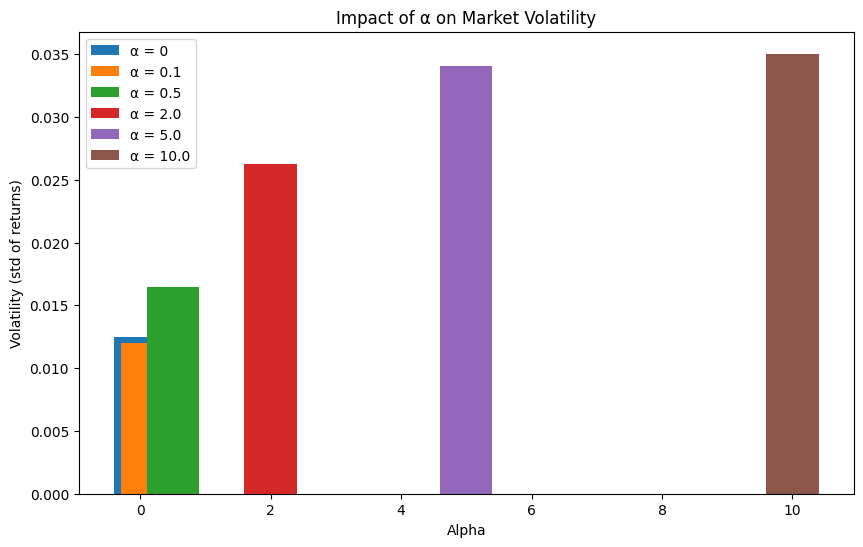

In [43]:
# Calcul et affichage de la volatilité
plt.figure(figsize=(10, 6))
for alpha, values in magnetisation_values.items():
    returns = np.diff(values)
    volatility = np.std(returns)
    plt.bar([alpha], [volatility], label=f'α = {alpha}')
plt.xlabel("Alpha")
plt.ylabel("Volatility (std of returns)")
plt.title("Impact of α on Market Volatility")
plt.legend()
plt.show()

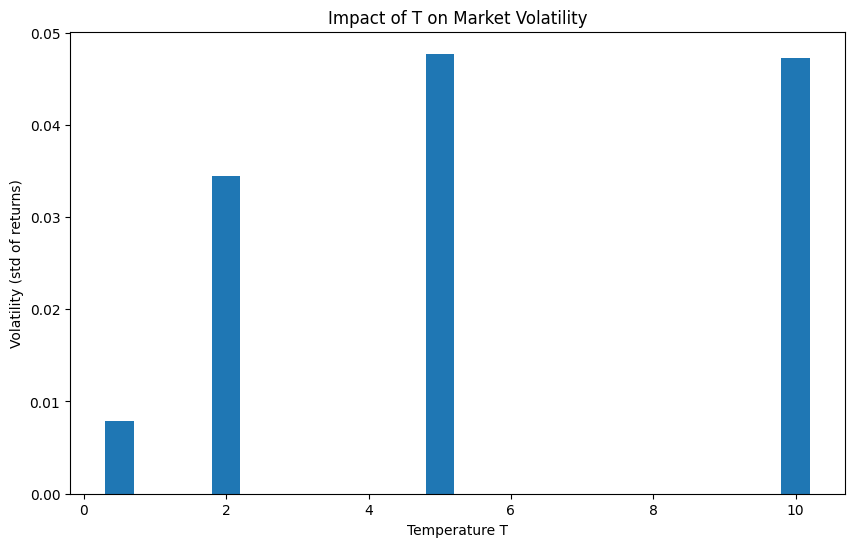

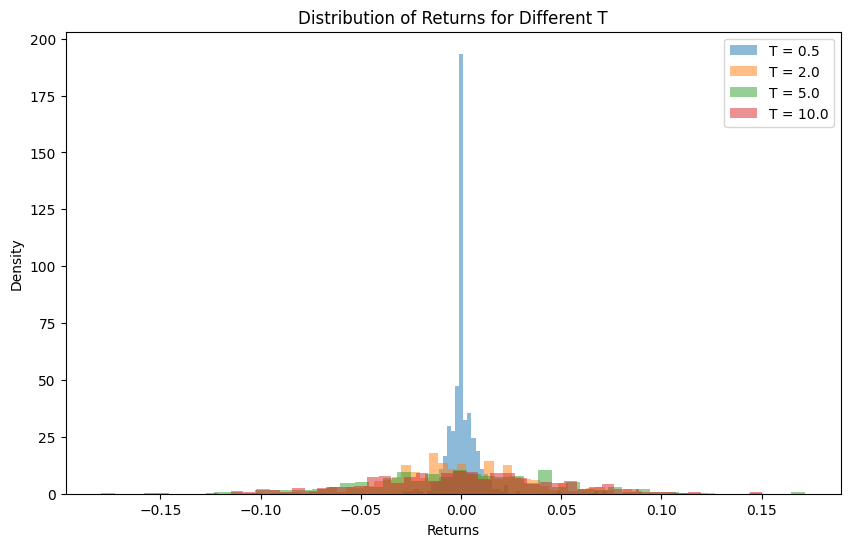

In [54]:
# Stockage des résultats
magnetisation_values = {}
volatility_values = {}
TT = [0.5, 2.0, 5.0, 10.0]

for T in TT:
    SEED = 42
    np.random.seed(SEED)
    random.seed(SEED)
    
    beta = 1.0 / T
    reduced_neighbour_coupling = -2.0 * beta * j
    reduced_alpha = -2.0 * beta * alpha  
    
    spin_system = SpinSystem(grid_height, grid_width, init_up=0.5)
    magnetisation = np.empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
    magnetisation[:] = np.nan
    
    for ii in range(total_updates):
        mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
        magnetisation[ii % MAX_FILE_SIZE] = mag
    
    magnetisation_values[T] = magnetisation.copy()
    
    # Calcul de la volatilité comme l'écart-type des rendements
    returns = np.diff(magnetisation)
    volatility_values[T] = np.std(returns)

# Tracé de la volatilité
plt.figure(figsize=(10, 6))
plt.bar(volatility_values.keys(), volatility_values.values(), width=0.4)
plt.xlabel("Temperature T")
plt.ylabel("Volatility (std of returns)")
plt.title("Impact of T on Market Volatility")
plt.show()

# Tracé de la distribution des rendements
plt.figure(figsize=(10, 6))
for T, values in magnetisation_values.items():
    returns = np.diff(values)
    plt.hist(returns, bins=50, alpha=0.5, label=f'T = {T}', density=True)
plt.xlabel("Returns")
plt.ylabel("Density")
plt.title("Distribution of Returns for Different T")
plt.legend()
plt.show()

# II. With crash

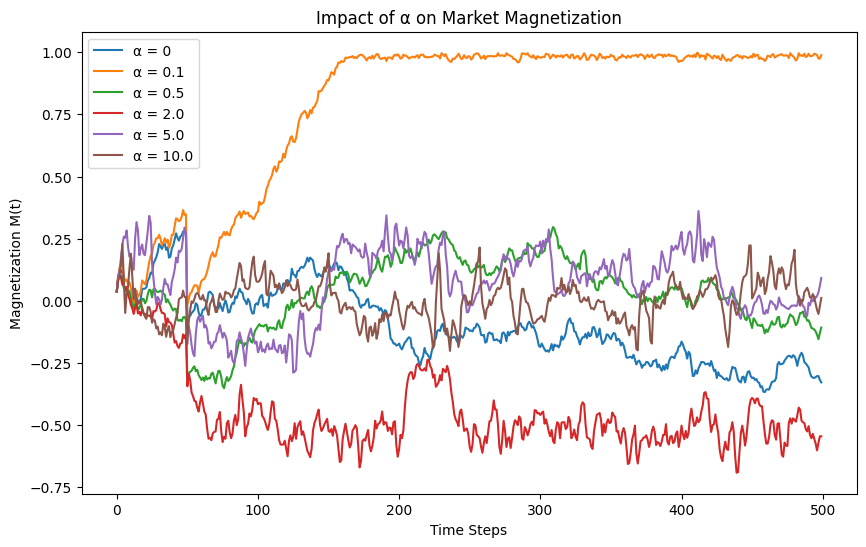

In [44]:
# Initialisation
crash_time = 50
magnetisation_values = {}
full_grids = {}

for alpha in alphas:
    SEED = 42
    np.random.seed(SEED)
    random.seed(SEED)
    
    reduced_alpha = -2.0 * beta * alpha
    spin_system = SpinSystem(grid_height=32, grid_width=32, init_up=0.5)
    magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
    magnetisation[:] = nan

    full_grid = []
    full_grid.append(reconstruct_grid(spin_system.black, spin_system.white))

    for ii in range(crash_time):
        mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
        magnetisation[ii % MAX_FILE_SIZE] = mag
        full_grid.append(reconstruct_grid(spin_system.black, spin_system.white))

    #choc local
    spin_system.induce_local_crash(fraction=1, region="bottom_right")
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grid.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[crash_time % MAX_FILE_SIZE] = mag

    for ii in range(crash_time+1, total_updates):
        mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
        magnetisation[ii % MAX_FILE_SIZE] = mag
        full_grid.append(reconstruct_grid(spin_system.black, spin_system.white))
        
    magnetisation_values[alpha] = magnetisation.copy()
    full_grids[alpha] = full_grid.copy()

# Tracé des courbes de magnétisation
plt.figure(figsize=(10, 6))
for alpha, values in magnetisation_values.items():
    plt.plot(values, label=f'α = {alpha}')
plt.xlabel("Time Steps")
plt.ylabel("Magnetization M(t)")
plt.title("Impact of α on Market Magnetization")
plt.legend()
plt.show()

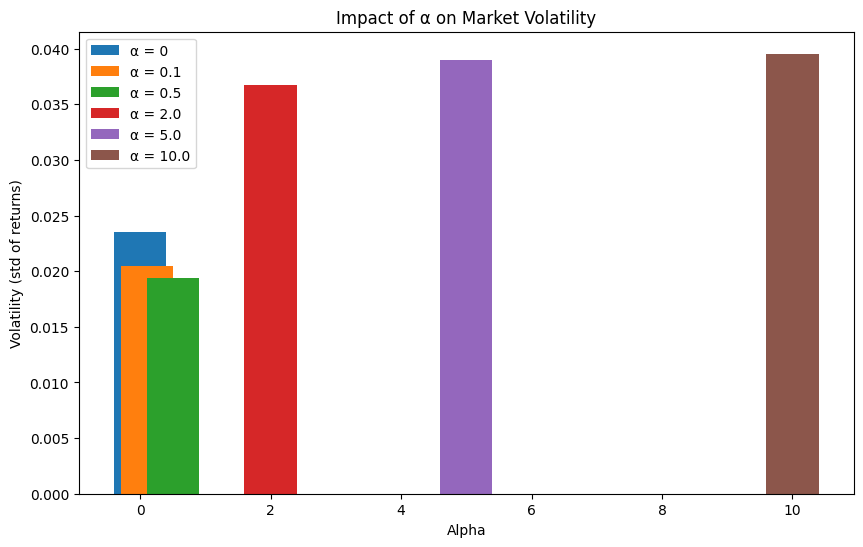

In [46]:
# Calcul et affichage de la volatilité
plt.figure(figsize=(10, 6))
for alpha, values in magnetisation_values.items():
    returns = np.diff(values)
    volatility = np.std(returns)
    plt.bar([alpha], [volatility], label=f'α = {alpha}')
plt.xlabel("Alpha")
plt.ylabel("Volatility (std of returns)")
plt.title("Impact of α on Market Volatility")
plt.legend()
plt.show()